In [2]:
import cv2 as cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pylab as plt
from  PIL import Image

In [ ]:
img=cv2.imread("/content/Bit plane slicing.bmp");

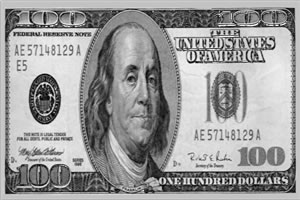

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(200, 300, 3)

# **CONTRAST STRETCHING**

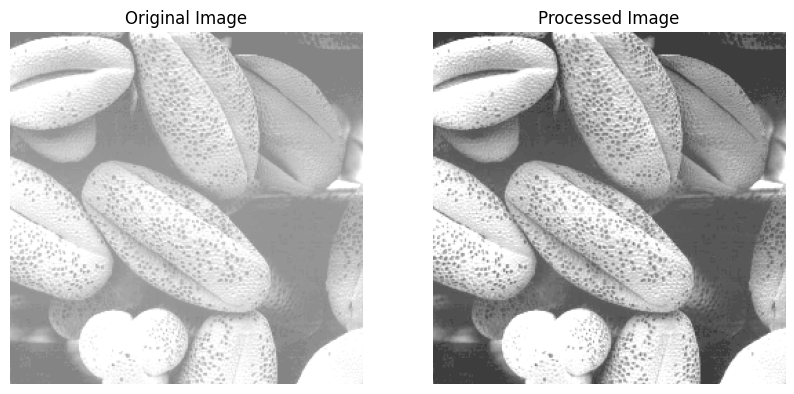

In [8]:
img=cv2.imread('/content/hist2.bmp')
w,h,d=img.shape
img2=img.copy()
r1=120
s1=225
r2=150
s2=90

m1=s1/r1
m2=(s2-s1)/(r2-r1)
m3=(255-s2)/(255-r2)

for i in range(w):
  for j in range(h):
    for k in range(d):
      if((img[i][j][k])<r1):
        img2[i][j][k]=m1*img[i][j][k];
      elif (img[i][j][k]==r1 and img[i][j][k]<=r2):
        img2[i][j][k]=(img[i][j][k]-r1)*m2+s1;
      else:
        img2[i][j][k]=(img[i][j][k]-r2)*m3+s2;
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display processed image
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.show()

# **BIT PLANE SLICING**

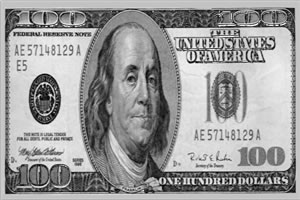

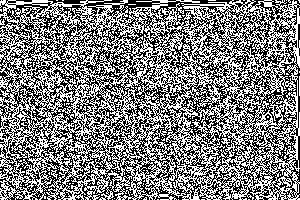

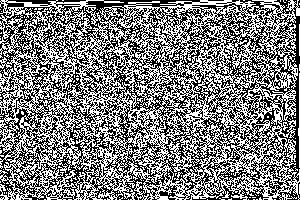

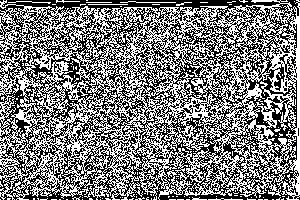

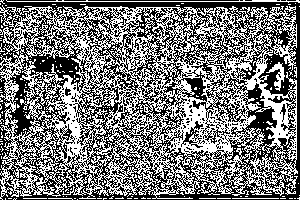

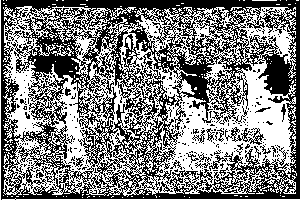

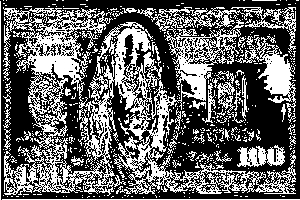

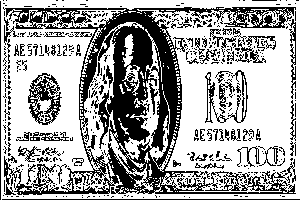

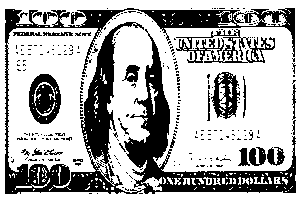

In [ ]:
img=cv2.imread("/content/Bit plane slicing.bmp",0);
slices=[]
for i in range(8):
  plane=np.zeros_like(img)
  plane[img&(1<<i)!=0]=255
  slices.append(plane)

cv2_imshow(img)
for i,slice in enumerate(slices):
  cv2_imshow(slice)


# **GRAY LEVEL SLICING WITH BACKGROUND**

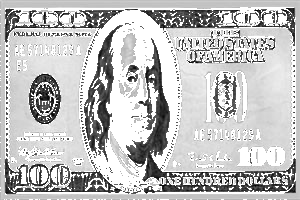

In [ ]:
#
img = cv2.imread('/content/Bit plane slicing.bmp',0)
m,n = img.shape
T1 = 100 #lower threshold value
T2 = 180 #upper threshold value
img_gray_bg= np.zeros((m,n), dtype = int)

for i in range(m):

	for j in range(n):

		if T1 < img[i,j] < T2:
			img_gray_bg[i,j]= 255
		else:
			img_gray_bg[i,j] = img[i,j]

# Convert array to png image
cv2.imwrite('TS1_Grey_Level_Slicing_withbackground.png', img_gray_bg)
cv2_imshow(img_gray_bg)

# **GRAY LEVEL SLICING WITHOUT BACKGROUND**

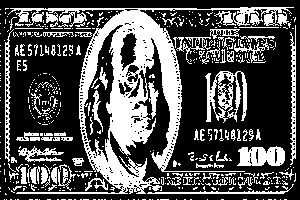

In [ ]:
img = cv2.imread('/content/Bit plane slicing.bmp',0)
m,n = img.shape
T1 = 100 #lower threshold value
T2 = 180 #upper threshold value
img_gray_bg= np.zeros((m,n), dtype = int)

for i in range(m):

	for j in range(n):

		if T1 < img[i,j] < T2:
			img_gray_bg[i,j]= 255
		else:
			img_gray_bg[i,j] = 0

# Convert array to png image
cv2.imwrite('TS1_Grey_Level_Slicing_withbackground.png', img_gray_bg)
cv2_imshow(img_gray_bg)